위 문서는 이승철교수님의 http://i-systems.github.io/HSE545/machine%20learning%20all/05%20Clustering/01_K-means_Clustering_python.html 을 따라했음을 밝힙니다

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

%matplotlib inline

- the only information clustering uses is the similarity between examples
- clustering groups examples based of their mutual similarities
- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity
    - it is a "chicken and egg" problem (dilemma)


> Q: if we knew  ci s, how would we determine which points to associate with each cluster center?

> A: for each point  x(i) , choose closest  ci 

> Q: if we knew the cluster memberships, how do we get the centers?

> A: choose  ci  to be the mean of all points in the cluster

### data generation

(300, 2)


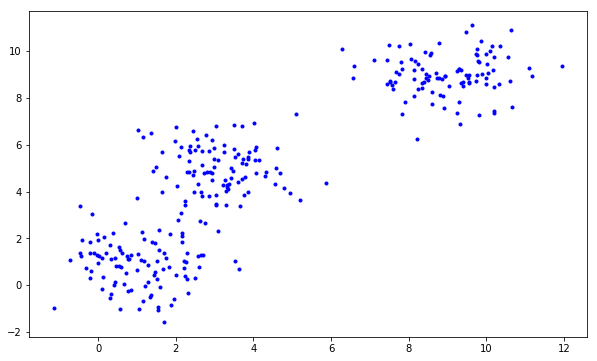

In [2]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

### Initalization : The number of clusters and data


[[ 3.77239109  4.64868122]
 [ 3.61198694  4.42269952]
 [-0.19708801  0.30159838]]


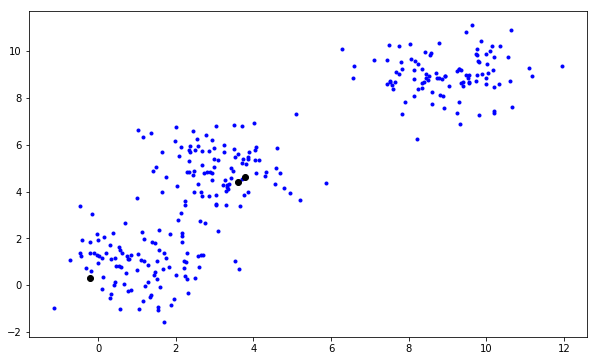

In [3]:
# The number of clusters and data
k = 3
m = X.shape[0]

# ramdomly initialize mean points
mu = X[np.random.randint(0,300,k),:]
pre_mu = mu.copy()
print(mu)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.plot(mu[:,0], mu[:,1], 'ko')
plt.show()

In [4]:
y = np.empty([m,1])

# Run K-means
for n_iter in range(500):
    for i in range(m):
        d0 = np.linalg.norm(X[i,:] - mu[0,:],2)
        d1 = np.linalg.norm(X[i,:] - mu[1,:],2)
        d2 = np.linalg.norm(X[i,:] - mu[2,:],2)
        y[i] = np.argmin([d0, d1, d2])
    
    err = 0
    for i in range(k):
        mu[i,:] = np.mean(X[np.where(y == i)[0]], axis=0)
        err += np.linalg.norm(pre_mu[i,:] - mu[i,:],2)
    
    pre_mu = mu.copy()

# 에러측정
    if err < 1e-10:
        print("Iteration:", n_iter)
        break    

Iteration: 3


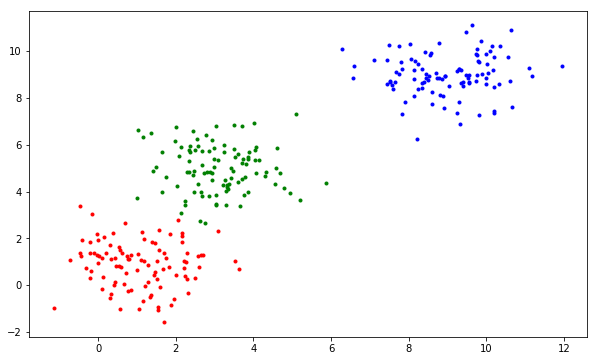

In [5]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]

plt.figure(figsize=(10, 6))
plt.plot(X0[:,0], X0[:,1], 'b.')
plt.plot(X1[:,0], X1[:,1], 'g.')
plt.plot(X2[:,0], X2[:,1], 'r.')
plt.show()

##  Some Issues in K-means
#### K-means: Initialization issues

- k-means is extremely senstitive to cluster center initialization
- Bad initialization can lead to 
    - Poor convergence speed
    - Bad overall clustering
- Safeguarding measures:
    - Choose first center as one of the examples, second which is the farthest from the first, third which is the farthest from both, and so on.
    - Try multiple initialization and choose the best result


#### Choosing the Number of Clusters
- Idea: when adding another cluster does not give much better modeling of the data

- One way to select  k  for the K-means algorithm is to try different values of  k , plot the K-means objective versus  k , and look at the 'elbow-point' in the plot

In [6]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)

In [9]:
X

matrix([[ 1.54410623,  2.04886294],
        [ 0.84093093,  2.18254577],
        [ 0.90655047,  1.11261328],
        [ 1.38049757,  1.03446114],
        [ 0.05288594,  0.10992744],
        [ 0.05620978,  0.39775332],
        [ 1.51273444,  0.19954593],
        [ 1.20206191,  1.96686662],
        [ 1.18995582,  1.00186602],
        [-0.09832546,  0.65275601],
        [ 1.78545125,  0.99456261],
        [ 1.70044335,  1.37091896],
        [-1.19174714,  2.32159065],
        [ 0.42279427,  0.99801348],
        [ 1.63706323,  0.06543152],
        [-0.10161973,  0.22570062],
        [-0.05529529,  0.28338506],
        [ 2.30313141, -0.52063543],
        [ 2.70676024,  1.98823341],
        [-1.00929555,  2.93545945],
        [-0.02211875,  0.89993563],
        [ 0.3501695 ,  2.41717606],
        [ 1.72118692,  0.38020101],
        [ 0.08296931,  1.69463813],
        [-0.2052691 ,  2.00354957],
        [-0.05552429,  1.45286472],
        [ 1.01122187,  0.97896898],
        [ 2.26510199,  0.721

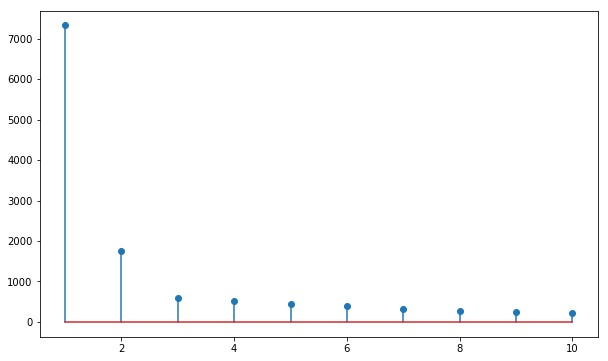

In [7]:
from sklearn.cluster import KMeans

cost = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    cost.append(abs(kmeans.score(X)))

plt.figure(figsize=(10,6))
plt.stem(range(1,11),cost)
plt.show()